In [16]:
from torchvision import models

In [17]:
dir(models)[:5]

['AlexNet', 'DenseNet', 'GoogLeNet', 'GoogLeNetOutputs', 'Inception3']

In [18]:
alexnet = models.AlexNet()

In [19]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/pulkit/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [25]:
from torchvision import transforms
preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])




In [27]:
from PIL import Image

In [28]:
img = Image.open('dog.jpg')

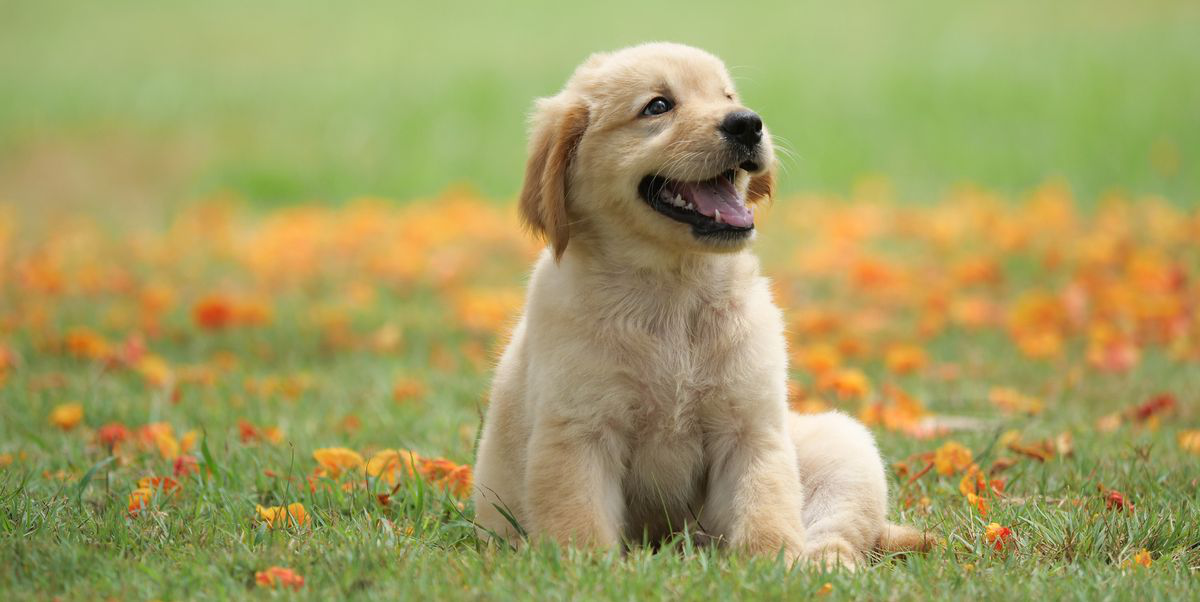

In [31]:
img

In [32]:
img.show()

In [33]:
img_t = preprocess(img)

In [34]:
import torch 
batch_t = torch.unsqueeze(img_t,0)

In [36]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [37]:
out =resnet(batch_t)

In [38]:
with open ('imagenet_classes.txt') as f:
    labels = [ line.strip()  for line in f.readlines()]

In [41]:
_,index = torch.max(out,1)

In [45]:

percentage  = torch.nn.functional.softmax(out,dim=1)[0] * 100

In [48]:
labels[index[0]] ,percentage[index[0]].item()

('golden retriever', 95.80868530273438)

In [51]:
_ , indices = torch.sort(out,descending = True)

In [62]:
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 95.80868530273438),
 ('Brittany spaniel', 0.8185570240020752),
 ('Labrador retriever', 0.6832239031791687),
 ('tennis ball', 0.42960280179977417),
 ('cocker spaniel, English cocker spaniel, cocker', 0.3764537572860718)]